### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
r = requests.get('https://covid19.ncdc.gov.ng')
soup = BeautifulSoup(r.text,'lxml')
soup


<!DOCTYPE html>
<html lang="en">
<head><meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<title>NCDC Coronavirus COVID-19 Microsite</title>
<!--[if lt IE 11]>
    	<script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
    	<script src="https://oss.maxcdn.com/libs/respond.js/1.4.2/respond.min.js"></script>
    	<![endif]-->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, user-scalable=0, minimal-ui" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="" name="description"/>
<meta content="" name="keywords"/>
<meta content="Codedthemes" name="author"/>
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','da

In [3]:
table = soup.find('table',{'id':'custom1'})
table

<table id="custom1">
<thead>
<tr>
<th>States Affected</th>
<th>No. of Cases (Lab Confirmed)</th>
<th>No. of Cases (on admission)</th>
<th>No. Discharged</th>
<th>No. of Deaths</th>
</tr>
</thead>
<tbody>
<tr>
<td>
Lagos
</td>
<td>103,145
</td>
<td>2
</td>
<td>102,372
</td>
<td>771
</td>
</tr>
<tr>
<td>
FCT
</td>
<td>29,161
</td>
<td>120
</td>
<td>28,792
</td>
<td>249
</td>
</tr>
<tr>
<td>
Rivers
</td>
<td>17,755
</td>
<td>180
</td>
<td>17,420
</td>
<td>155
</td>
</tr>
<tr>
<td>
Kaduna
</td>
<td>11,487
</td>
<td>20
</td>
<td>11,378
</td>
<td>89
</td>
</tr>
<tr>
<td>
Oyo
</td>
<td>10,328
</td>
<td>2
</td>
<td>10,124
</td>
<td>202
</td>
</tr>
<tr>
<td>
Plateau
</td>
<td>10,309
</td>
<td>27
 </td>
<td>10,207
</td>
<td>75
</td>
</tr>
<tr>
<td>
Edo
</td>
<td>7,821
</td>
<td>102
</td>
<td>7,398
</td>
<td>321
</td>
</tr>
<tr>
<td>
Ogun
</td>
<td>5,810
</td>
<td>11
</td>
<td>5,717
</td>
<td>82
</td>
</tr>
<tr>
<td>
Delta
</td>
<td>5,653
</td>
<td>371
</td>
<td>5,170
</td>
<td>112
</td>
</tr>
<t

In [4]:
headers = []
for i in table.find_all('th'):
    title = i.text
    headers.append(title)

In [5]:
df = pd.DataFrame(columns = headers)

In [6]:
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths


In [7]:
for row in table.find_all('tr')[1:]:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    length = len(df)
    df.loc[length] = row_data

In [8]:
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"103,145",2,"102,372",771
1,FCT,"29,161",120,"28,792",249
2,Rivers,"17,755",180,"17,420",155
3,Kaduna,"11,487",20,"11,378",89
4,Oyo,"10,328",2,"10,124",202
5,Plateau,"10,309",27,"10,207",75
6,Edo,"7,821",102,"7,398",321
7,Ogun,"5,810",11,"5,717",82
8,Delta,"5,653",371,"5,170",112
9,Kano,"5,186",50,"5,009",127


### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

## Dataset of global daily confirmed cases



In [9]:
PATH = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [10]:
df_confirmed = pd.read_csv(PATH)

In [11]:
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,190643,191040,191247,191585,191967,191967,191967,192463,192906,193004
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,326077,326181,326787,327232,327607,327961,328299,328515,328571,329017
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,269805,269894,269971,270043,270097,270145,270175,270194,270235,270272
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45975,45975,45975,46027,46027,46027,46027,46027,46027,46027
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,697447,698384,698384,698384,698384,698384,698384,698384,698384,701739
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11915,11915,11917,11919,11922,11922,11925,11925,11925,11926
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,332264,332527,332527,332648,332710,332710,332710,332710,332822,332822


## Dataset of global daily recovered cases

In [12]:
PATHS_R = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [13]:
df_recover = pd.read_csv(PATHS_R)

In [14]:
df_recover.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dataset of global daily death cases

In [15]:
PATH_D = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [16]:
df_death = pd.read_csv(PATH_D)

In [17]:
df_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7762,7767,7768,7769,7771,7771,7771,7777,7777,7777
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3576,3576,3577,3578,3579,3580,3581,3581,3581,3582
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5691,5694,5694,5694,5694,5694,5694,5694,5694,5700
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2154,2154,2154,2155,2155,2155,2155,2155,2155,2155
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4016,4016,4016,4016,4016,4016,4016,4016,4016,4016


## C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [18]:
df_budget = pd.read_csv('Budget_data.csv')

In [19]:
df_covid_external = pd.read_csv('covid_external.csv')

In [20]:
df_real_gdp = pd.read_csv('RealGDP.csv')

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [21]:
df_budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [24]:
df_covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [25]:
df_real_gdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


### Task 3 - Data Cleaning and Preparation
From the information obtained above, I fixed the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

### Cleaning the Scraped Data 

In [26]:
df.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)    object
No. of Cases (on admission)     object
No. Discharged                  object
No. of Deaths                   object
dtype: object

In [27]:
df.rename(columns = {'States Affected':'states','No. of Cases (Lab Confirmed)':'Confirmed Cases','No. of Cases (on admission)':'Admitted Cases','No. Discharged':'Discharged Cases','No. of Deaths':'Death Cases'},inplace = True)

In [28]:
df

,states,Confirmed Cases,Admitted Cases,Discharged Cases,Death Cases
0,Lagos,"103,145",2,"102,372",771
1,FCT,"29,161",120,"28,792",249
2,Rivers,"17,755",180,"17,420",155
3,Kaduna,"11,487",20,"11,378",89
4,Oyo,"10,328",2,"10,124",202
5,Plateau,"10,309",27,"10,207",75
6,Edo,"7,821",102,"7,398",321
7,Ogun,"5,810",11,"5,717",82
8,Delta,"5,653",371,"5,170",112
9,Kano,"5,186",50,"5,009",127


In [29]:
df = df.replace(',','', regex=True)

In [30]:
df.head()

,states,Confirmed Cases,Admitted Cases,Discharged Cases,Death Cases
0,Lagos,103145,2,102372,771
1,FCT,29161,120,28792,249
2,Rivers,17755,180,17420,155
3,Kaduna,11487,20,11378,89
4,Oyo,10328,2,10124,202


### Cleaning John Hopkins data

In [31]:
df_confirmed.drop(['Province/State','Lat','Long'], axis = 1,inplace = True)

In [32]:
df_confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,190643,191040,191247,191585,191967,191967,191967,192463,192906,193004
1,Albania,0,0,0,0,0,0,0,0,0,...,326077,326181,326787,327232,327607,327961,328299,328515,328571,329017
2,Algeria,0,0,0,0,0,0,0,0,0,...,269805,269894,269971,270043,270097,270145,270175,270194,270235,270272
3,Andorra,0,0,0,0,0,0,0,0,0,...,45975,45975,45975,46027,46027,46027,46027,46027,46027,46027
4,Angola,0,0,0,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


In [33]:
df_recover.drop(['Province/State','Lat','Long'], axis = 1,inplace = True)

In [34]:
df_recover.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_death.drop(['Province/State','Lat','Long'], axis = 1,inplace = True)

In [36]:
df_death.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7762,7767,7768,7769,7771,7771,7771,7777,7777,7777
1,Albania,0,0,0,0,0,0,0,0,0,...,3576,3576,3577,3578,3579,3580,3581,3581,3581,3582
2,Algeria,0,0,0,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
3,Andorra,0,0,0,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,Angola,0,0,0,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


### Extracting Daily Data from the Global Daily Cases

* #### Nigeria Daily Data for Confirmed Cases

In [37]:
nigeria_confirmed = df_confirmed[df_confirmed["Country/Region"] == "Nigeria"]

In [38]:
nigeria_confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
204,Nigeria,0,0,0,0,0,0,0,0,0,...,262912,262912,263090,263090,263322,263322,263407,263407,263407,263526


* #### Nigeria Daily Data for Recovered Cases

In [39]:
nigeria_recovered = df_recover[df_recover["Country/Region"] == "Nigeria"]

In [40]:
nigeria_recovered

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
189,Nigeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* #### Nigeria Daily Data for Death Cases

In [41]:
nigeria_death_cases = df_death[df_death["Country/Region"] == "Nigeria"]

In [42]:
nigeria_death_cases

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
204,Nigeria,0,0,0,0,0,0,0,0,0,...,3147,3147,3148,3148,3148,3148,3148,3148,3148,3148


### A Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [43]:
columns = nigeria_confirmed.iloc[:, 4:]

df_nigeria_confirmed = nigeria_confirmed.melt(value_vars=columns, var_name="Date", value_name="Cases")

In [44]:
df_nigeria_confirmed.head()

,Date,Cases
0,1/25/20,0
1,1/26/20,0
2,1/27/20,0
3,1/28/20,0
4,1/29/20,0


* #### Cleaning the data by making date a datetime datatype.

In [45]:
df_nigeria_confirmed["Date"] = df_nigeria_confirmed["Date"].apply(pd.to_datetime, errors='coerce')

### A Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [46]:
columns = nigeria_recovered.iloc[:, 4:]

df_nigeria_recovered = nigeria_recovered.melt(value_vars=columns, var_name="Date", value_name="Cases")

In [47]:
df_nigeria_recovered.head()

,Date,Cases
0,1/25/20,0
1,1/26/20,0
2,1/27/20,0
3,1/28/20,0
4,1/29/20,0


* #### Cleaning the data by making date a datetime datatype.

In [48]:
df_nigeria_recovered["Date"] = df_nigeria_recovered["Date"].apply(pd.to_datetime, errors='coerce')

### A Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [49]:
columns = nigeria_death_cases.iloc[:, 4:]

df_nigeria_death_cases = nigeria_death_cases.melt(value_vars=columns, var_name="Date", value_name="Cases")

In [50]:
df_nigeria_death_cases.head()

,Date,Cases
0,1/25/20,0
1,1/26/20,0
2,1/27/20,0
3,1/28/20,0
4,1/29/20,0


* #### Cleaning the data by making date a datetime datatype.

In [51]:
df_nigeria_death_cases["Date"] = df_nigeria_death_cases["Date"].apply(pd.to_datetime, errors='coerce')

## Task 4 - Data Visualization

### TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [52]:
df['Confirmed Cases'] = pd.to_numeric(df['Confirmed Cases'])

In [53]:
df_ncdc_confirm = df.sort_values(by = ['Confirmed Cases'],ascending=False).head(10)

In [54]:
df_ncdc_confirm

,states,Confirmed Cases,Admitted Cases,Discharged Cases,Death Cases
0,Lagos,103145,2,102372,771
1,FCT,29161,120,28792,249
2,Rivers,17755,180,17420,155
3,Kaduna,11487,20,11378,89
4,Oyo,10328,2,10124,202
5,Plateau,10309,27,10207,75
6,Edo,7821,102,7398,321
7,Ogun,5810,11,5717,82
8,Delta,5653,371,5170,112
9,Kano,5186,50,5009,127


Text(0.5, 1.0, 'Top 10 States in terms of Confirmed Cases')

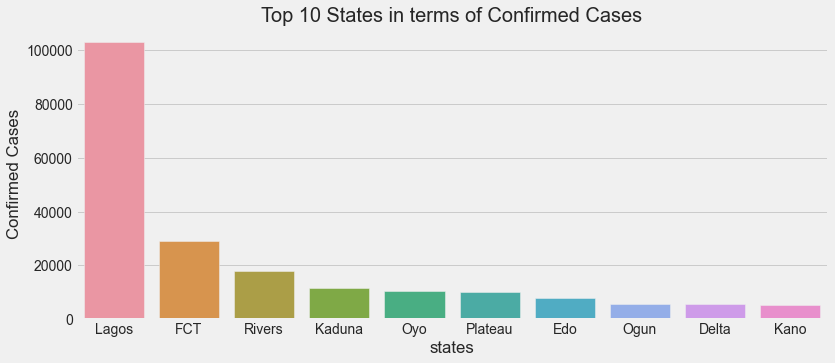

In [55]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'states',y = 'Confirmed Cases',data = df_ncdc_confirm).set_title('Top 10 States in terms of Confirmed Cases',fontsize = 20)

#### Summary: Lagos State tops in terms of Confirmed Cases with FCT(Abuja) second and Rivers State is third.

### TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

In [56]:
df['Discharged Cases'] = pd.to_numeric(df['Discharged Cases'])

In [57]:
df_ncdc_discharged = df.sort_values(by = ['Discharged Cases'],ascending=False).head(11)

In [58]:
df_ncdc_discharged

,states,Confirmed Cases,Admitted Cases,Discharged Cases,Death Cases
0,Lagos,103145,2,102372,771
1,FCT,29161,120,28792,249
2,Rivers,17755,180,17420,155
3,Kaduna,11487,20,11378,89
5,Plateau,10309,27,10207,75
4,Oyo,10328,2,10124,202
6,Edo,7821,102,7398,321
7,Ogun,5810,11,5717,82
8,Delta,5653,371,5170,112
9,Kano,5186,50,5009,127


Text(0.5, 1.0, 'Top 10 States in terms of Discharged Cases')

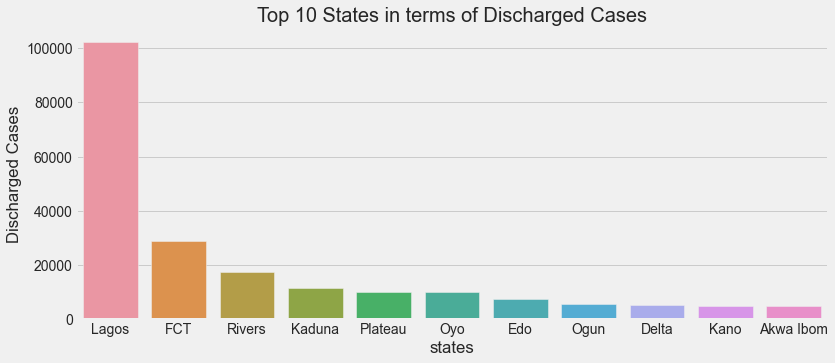

In [59]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'states',y = 'Discharged Cases',data = df_ncdc_discharged).set_title('Top 10 States in terms of Discharged Cases',fontsize = 20)

#### Summary:  Lagos State tops in terms of Discharged Cases with FCT(Abuja) second and Rivers State is third.

### TODO C - Plot the top 10 Death cases

In [60]:
df['Death Cases'] = pd.to_numeric(df['Death Cases'])

In [61]:
df_ncdc_death = df.sort_values(by = ['Death Cases'],ascending=False).head(11)

In [62]:
df_ncdc_death

,states,Confirmed Cases,Admitted Cases,Discharged Cases,Death Cases
0,Lagos,103145,2,102372,771
6,Edo,7821,102,7398,321
1,FCT,29161,120,28792,249
4,Oyo,10328,2,10124,202
2,Rivers,17755,180,17420,155
9,Kano,5186,50,5009,127
8,Delta,5653,371,5170,112
10,Ondo,5173,315,4749,109
13,Osun,3311,29,3190,92
3,Kaduna,11487,20,11378,89


Text(0.5, 1.0, 'Top 10 States in terms of Death Cases')

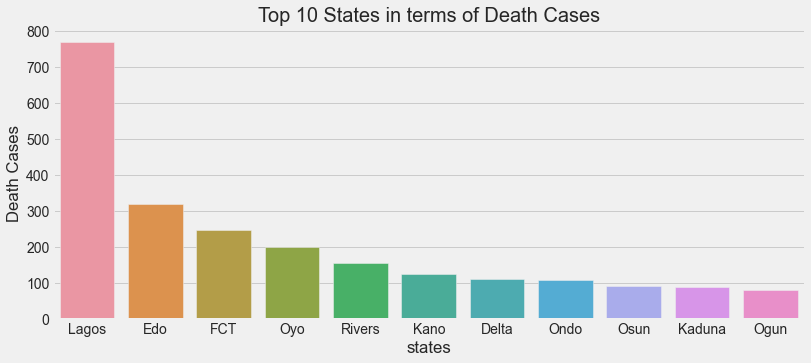

In [63]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'states',y = 'Death Cases',data = df_ncdc_death).set_title('Top 10 States in terms of Death Cases',fontsize = 20)

#### Summary:  Lagos State tops in terms of Death Cases with Edo State second and FCT is third.

### TODO D - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

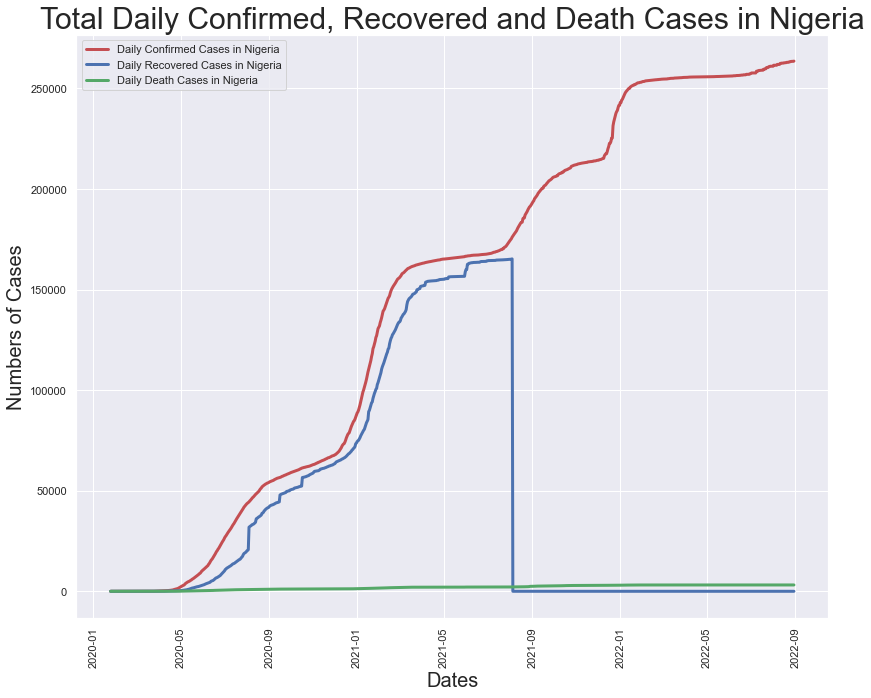

In [64]:
sns.set(rc={'figure.figsize':(12,10)})

sns.lineplot(df_nigeria_confirmed.Date, df_nigeria_confirmed.Cases,linewidth=3, label="Daily Confirmed Cases in Nigeria", color="r", markers="o")

sns.lineplot(df_nigeria_recovered.Date, df_nigeria_recovered.Cases,linewidth=3, label="Daily Recovered Cases in Nigeria", color="b")

sns.lineplot(df_nigeria_death_cases.Date, df_nigeria_death_cases.Cases,linewidth=3, label="Daily Death Cases in Nigeria", color="g")

#Title, labels and legend
plt.xlabel("Dates", fontsize=20)
plt.ylabel("Numbers of Cases", fontsize=20)
plt.xticks(rotation=90)
plt.title ("Total Daily Confirmed, Recovered and Death Cases in Nigeria", fontsize=30)
plt.show()

### TODO E - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

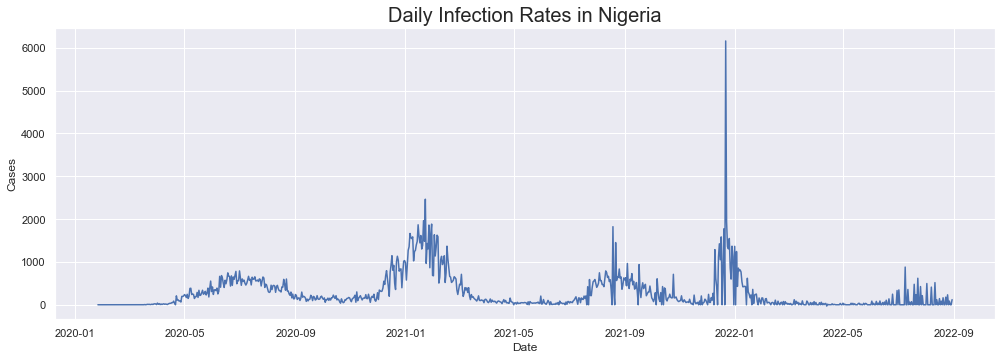

In [65]:
df_nigeria_daily_infection_rate = df_nigeria_confirmed.Cases.diff()
plt.figure(figsize=(15,5))
sns.lineplot(df_nigeria_confirmed.Date, df_nigeria_daily_infection_rate).set_title("Daily Infection Rates in Nigeria", fontdict = { 'fontsize': 20});

### TODO F - 
* Calculate maximum infection rate for a day (Number of new cases)


In [66]:
df_nigeria_confirmed["Daily Infection Rate"] = df_nigeria_confirmed["Cases"].diff()
max_infection = df_nigeria_confirmed["Daily Infection Rate"].max()

In [67]:
max_infection

6158.0

### TODO G - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.


In [68]:
df2 = pd.merge(df,df_covid_external,on = 'states')

In [69]:
df2

,states,Confirmed Cases,Admitted Cases,Discharged Cases,Death Cases,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,103145,2,102372,771,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29161,120,28792,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,17755,180,17420,155,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11487,20,11378,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10328,2,10124,202,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Plateau,10309,27,10207,75,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
6,Edo,7821,102,7398,321,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,5810,11,5717,82,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Delta,5653,371,5170,112,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
9,Kano,5186,50,5009,127,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87


In [70]:
df_confirmed_vulnerabilty = df2.nlargest(10,['Confirmed Cases','Overall CCVI Index'])

In [71]:
df_confirmed_vulnerabilty

,states,Confirmed Cases,Admitted Cases,Discharged Cases,Death Cases,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,103145,2,102372,771,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29161,120,28792,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,17755,180,17420,155,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11487,20,11378,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10328,2,10124,202,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Plateau,10309,27,10207,75,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
6,Edo,7821,102,7398,321,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,5810,11,5717,82,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Delta,5653,371,5170,112,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
9,Kano,5186,50,5009,127,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87


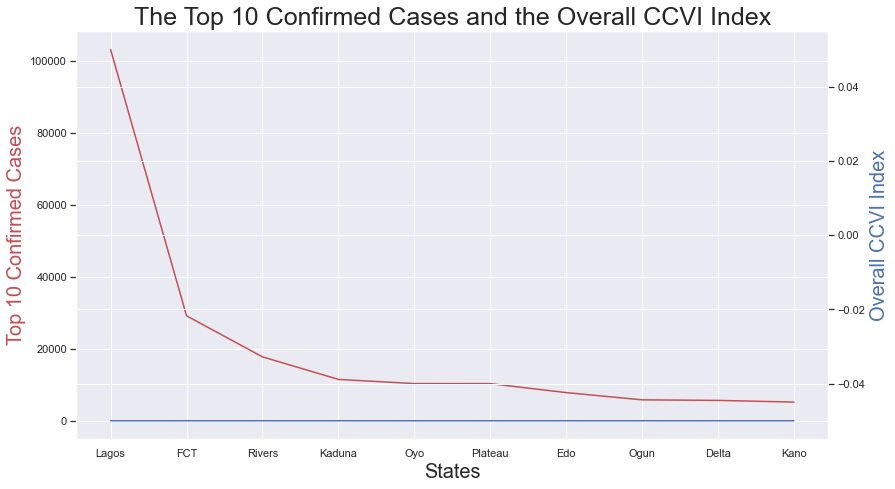

In [72]:
x=df_confirmed_vulnerabilty['states']
y1 = df_confirmed_vulnerabilty['Confirmed Cases']
y2 = df_confirmed_vulnerabilty['Overall CCVI Index']
fig, ax1 = plt.subplots(figsize = (12,7))
plt.title('The Top 10 Confirmed Cases and the Overall CCVI Index',fontsize=25)
ax1.set_xlabel('States',fontsize=20)
ax1.set_ylabel('Top 10 Confirmed Cases',color = 'r',fontsize=20)
ax2 = ax1.twinx()
ax2.set_ylabel('Overall CCVI Index',color = 'b',fontsize=20)
curve1 = ax1.plot(x, y1, label = 'Confirmed Cases', color = 'r')
curve2 = ax1.plot(x, y2, label='Overall CCVI Index', color = 'b')
plt.plot()
plt.show()


### TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here I generated a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.


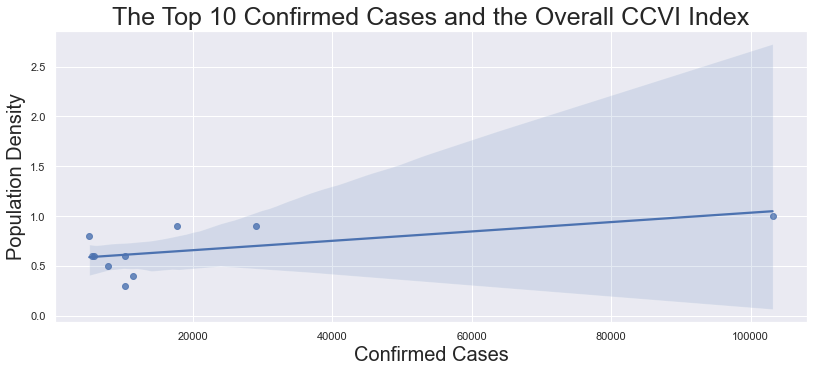

In [73]:
b = df_confirmed_vulnerabilty['Confirmed Cases']
c = df_confirmed_vulnerabilty['Population Density']
plt.subplots(figsize = (12,5))
plt.title('The Top 10 Confirmed Cases and the Overall CCVI Index',fontsize=25)
plt.xlabel('States',fontsize=20)
plt.ylabel('Population Density',fontsize=20)
sns.regplot(x=b,y= c, data= df_confirmed_vulnerabilty)
plt.show()

## TODO L -
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 


In [74]:

df_nigeria_real_gdp = df_real_gdp.melt(id_vars= 'Year',value_vars= ['Q1','Q2','Q3','Q4'],var_name='Quarters',value_name = 'Quarter_value')
df_nigeria_real_gdp

,Year,Quarters,Quarter_value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


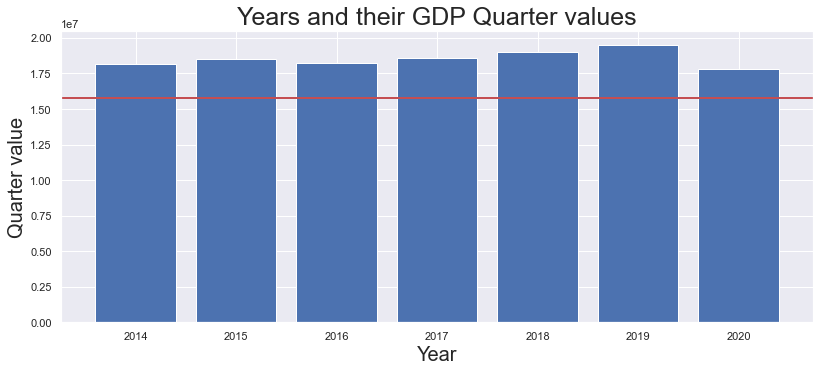

In [77]:
d=df_nigeria_real_gdp['Year']
e= df_nigeria_real_gdp['Quarter_value']
plt.subplots(figsize=(12,5))
plt.bar(d,e)
plt.axhline(1.58e7,c='r',linewidth=2)
plt.title('Years and their GDP Quarter values',fontsize=25)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Quarter value',fontsize=20)
plt.show()

#### Summary: The red horizontal line is the quarter value of 2020 Q2 which is the lowest GDP of the country due to the effect of Covid-19.